eulerstep, nstep=10, erms=0.0512975052794777
rk2step, nstep=10, erms=0.0017502595909501628
rk4step, nstep=10, erms=8.819417313096405e-07


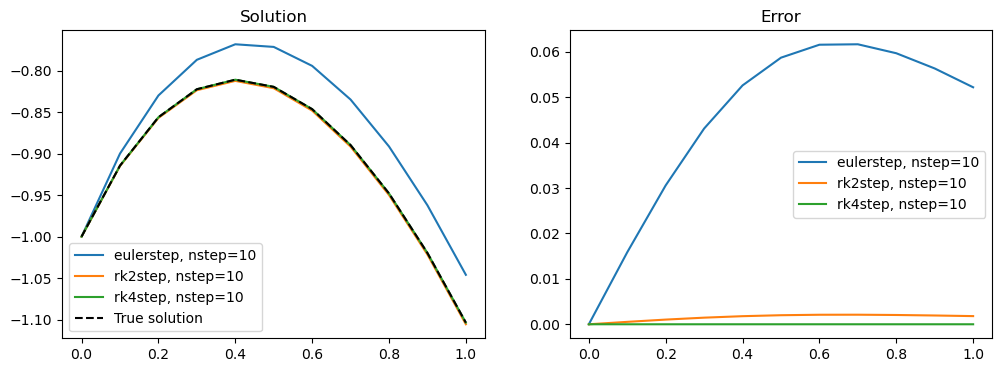

eulerstep, nstep=100, erms=0.0047790107182321745
rk2step, nstep=100, erms=1.59682556913557e-05
rk4step, nstep=100, erms=7.990740687811288e-11


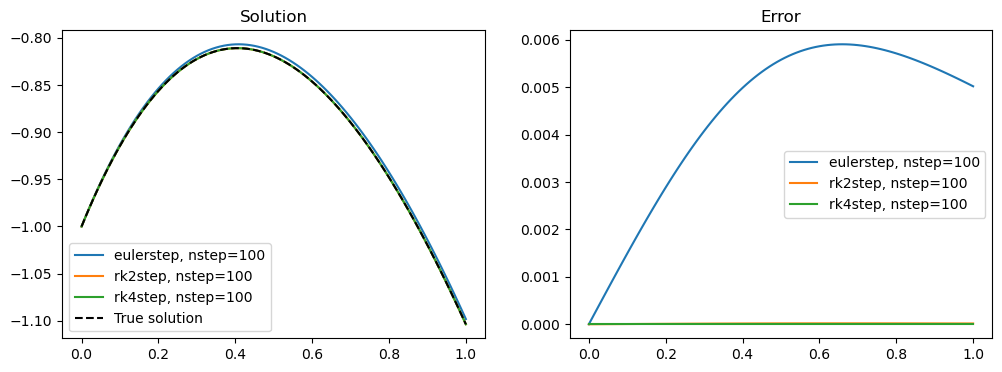

eulerstep, nstep=1000, erms=0.0004745257918419716
rk2step, nstep=1000, erms=1.5821325785182167e-07
rk4step, nstep=1000, erms=8.56184842147185e-15


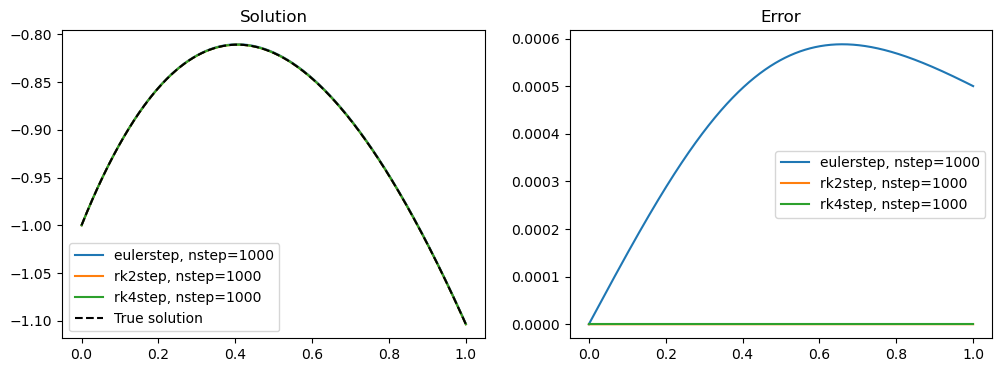

eulerstep, nstep=10000, erms=4.7418948554699406e-05
rk2step, nstep=10000, erms=1.5806712340906817e-09
rk4step, nstep=10000, erms=2.12042928766821e-15


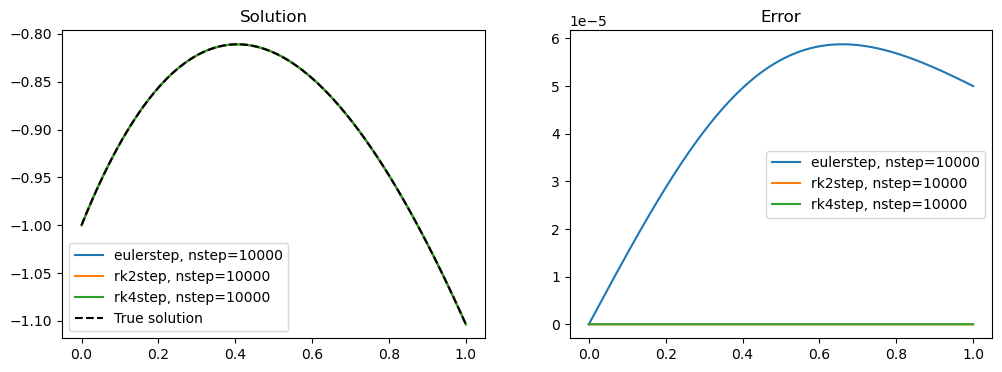

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE
def f(x, y):
    return -2*x - y

# Analytical solution
def y_true(x):
    return -3 * np.exp(-x) - 2 * x + 2

# Euler method
def eulerstep(x, y, h, f):
    return y + h*f(x, y)

# Runge-Kutta 2nd order
def rk2step(x, y, h, f):
    k1 = h*f(x, y)
    k2 = h*f(x + h, y + k1)
    return y + 0.5*(k1 + k2)

# Runge-Kutta 4th order
def rk4step(x, y, h, f):
    k1 = h*f(x, y)
    k2 = h*f(x + 0.5*h, y + 0.5*k1)
    k3 = h*f(x + 0.5*h, y + 0.5*k2)
    k4 = h*f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

# Fixed-step ODE solver
def ode_fixedstep(x0, y0, xend, nstep, stepper, f):
    h = (xend - x0)/nstep
    x = np.linspace(x0, xend, nstep+1)
    y = np.zeros(nstep+1)
    y[0] = y0
    for i in range(nstep):
        y[i+1] = stepper(x[i], y[i], h, f)
    return x, y

# Test the integrators
for nstep in [10, 100, 1000, 10000]:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for stepper in [eulerstep, rk2step, rk4step]:
        x, y = ode_fixedstep(0, -1, 1, nstep, stepper, f)
        e = np.abs(y - y_true(x))/np.abs(y_true(x))
        erms = np.sqrt(np.sum(e**2)/nstep)
        print(f'{stepper.__name__}, nstep={nstep}, erms={erms}')
        axs[0].plot(x, y, label=f'{stepper.__name__}, nstep={nstep}')
        axs[1].plot(x, e, label=f'{stepper.__name__}, nstep={nstep}')
    axs[0].plot(x, y_true(x), 'k--', label='True solution')
    axs[0].legend()
    axs[0].set_title('Solution')
    axs[1].legend()
    axs[1].set_title('Error')
    plt.show()


# Discuss the improvement of the solution for each integrator and step number, and compare to your expectations

### It is immediately obvious that if you increase the number of steps for each integrator, it becomes closer to the analytic solution. RK2 and RK4 were pretty close even with just 10 steps, but euler was far off. The eulerstep method performed the worst, but still, even its error is quite small. 